In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Haebichan/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
pd.set_option('display.max_colwidth', 1000)

In [20]:
df = pd.read_csv('data/Train.zip')

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
# df.saledate = pd.to_datetime(df.saledate)

In [22]:
data_dic = pd.read_excel('data/Data Dictionary.xlsx')

In [23]:
test = pd.read_csv('data/Test.zip')

In [24]:
df.columns = [col.strip().lower() for col in df.columns]

In [25]:
# df = df.set_index('SalesID')

In [26]:
# test = test.set_index('SalesID')

In [27]:
list(df.columns)

['salesid',
 'saleprice',
 'machineid',
 'modelid',
 'datasource',
 'auctioneerid',
 'yearmade',
 'machinehourscurrentmeter',
 'usageband',
 'saledate',
 'fimodeldesc',
 'fibasemodel',
 'fisecondarydesc',
 'fimodelseries',
 'fimodeldescriptor',
 'productsize',
 'fiproductclassdesc',
 'state',
 'productgroup',
 'productgroupdesc',
 'drive_system',
 'enclosure',
 'forks',
 'pad_type',
 'ride_control',
 'stick',
 'transmission',
 'turbocharged',
 'blade_extension',
 'blade_width',
 'enclosure_type',
 'engine_horsepower',
 'hydraulics',
 'pushblock',
 'ripper',
 'scarifier',
 'tip_control',
 'tire_size',
 'coupler',
 'coupler_system',
 'grouser_tracks',
 'hydraulics_flow',
 'track_type',
 'undercarriage_pad_width',
 'stick_length',
 'thumb',
 'pattern_changer',
 'grouser_type',
 'backhoe_mounting',
 'blade_type',
 'travel_controls',
 'differential_type',
 'steering_controls']

In [28]:
def get_info(row_name):
    
    print(row_name + ': ' +data_dic[data_dic['Variable'] == row_name]['Description'].values[0])


In [29]:
def find_na_percent(df, column_name):
#     return 'Percent of missing NA: {}'.format(len(df[df[column_name].isnull()]) / len(df) * 100)
      return float(len(df[df[column_name].isnull()]) / len(df) * 100)

In [30]:
def find_baseline_columns():
    k = []
    for i in df.columns:
        lst = find_na_percent(df, i)
        if lst == 0.0:
            k.append(i)
    return k   

In [31]:
get_info('SalesID')

SalesID:   unique identifier of a particular sale of a machine at auction


In [32]:
find_na_percent(df, 'backhoe_mounting')

80.38716110937986

In [33]:
col_names = find_baseline_columns()

In [34]:
df_base = df[col_names]
df_base.head()

,salesid,saleprice,machineid,modelid,datasource,yearmade,saledate,fimodeldesc,fibasemodel,fiproductclassdesc,state,productgroup,productgroupdesc
0,1139246,66000,999089,3157,121,2004,11/16/2006 0:00,521D,521,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader
1,1139248,57000,117657,77,121,1996,3/26/2004 0:00,950FII,950,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader
2,1139249,10000,434808,7009,121,2001,2/26/2004 0:00,226,226,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders
3,1139251,38500,1026470,332,121,2001,5/19/2011 0:00,PC120-6E,PC120,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators
4,1139253,11000,1057373,17311,121,2007,7/23/2009 0:00,S175,S175,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders


In [35]:
df_base.corr()['saleprice']

salesid       0.010725
saleprice     1.000000
machineid    -0.224854
modelid      -0.042125
datasource    0.015122
yearmade      0.156453
Name: saleprice, dtype: float64

In [36]:
top_pos_corr = df.corr()['saleprice'].sort_values(ascending = False)[:6]
top_neg_corr = df.corr()['saleprice'].sort_values()[:5]

In [37]:
top_pos_corr[1:]

yearmade                    0.156453
datasource                  0.015122
machinehourscurrentmeter    0.013560
salesid                     0.010725
modelid                    -0.042125
Name: saleprice, dtype: float64

In [38]:
top_neg_corr

machineid                  -0.224854
auctioneerid               -0.046865
modelid                    -0.042125
salesid                     0.010725
machinehourscurrentmeter    0.013560
Name: saleprice, dtype: float64

In [39]:
num_cols = df._get_numeric_data().columns

In [40]:
cat_cols = set(df.columns) - set(num_cols)

In [41]:
df_cat_cols = df[list(cat_cols)]

In [42]:
df_cat_cols.head(3)

,fisecondarydesc,drive_system,productgroupdesc,saledate,enclosure_type,fimodeldesc,fimodelseries,track_type,scarifier,forks,...,stick,state,productsize,enclosure,blade_width,grouser_tracks,ride_control,fibasemodel,steering_controls,differential_type
0,D,NaN,Wheel Loader,11/16/2006 0:00,NaN,521D,NaN,NaN,NaN,None or Unspecified,...,NaN,Alabama,NaN,EROPS w AC,NaN,NaN,None or Unspecified,521,Conventional,Standard
1,F,NaN,Wheel Loader,3/26/2004 0:00,NaN,950FII,II,NaN,NaN,None or Unspecified,...,NaN,North Carolina,Medium,EROPS w AC,NaN,NaN,None or Unspecified,950,Conventional,Standard
2,NaN,NaN,Skid Steer Loaders,2/26/2004 0:00,NaN,226,NaN,NaN,NaN,None or Unspecified,...,NaN,New York,NaN,OROPS,NaN,None or Unspecified,NaN,226,NaN,NaN


In [43]:
df_num_cols = df[num_cols]

# Check here

In [44]:
df_tex = df[df.productgroup == 'TEX']
df_ttt = df[df.productgroup == 'TTT']
df_bl = df[df.productgroup == 'BL']
df_wl = df[df.productgroup == 'WL']
df_SSL = df[df.productgroup == 'SSL']
df_MG = df[df.productgroup == 'MG']

In [45]:
df_tex.isnull().sum()

salesid                          0
saleprice                        0
machineid                        0
modelid                          0
datasource                       0
auctioneerid                  6051
yearmade                         0
machinehourscurrentmeter     64859
usageband                    81275
saledate                         0
fimodeldesc                      0
fibasemodel                      0
fisecondarydesc              58055
fimodelseries                79749
fimodeldescriptor            59065
productsize                    155
fiproductclassdesc               0
state                            0
productgroup                     0
productgroupdesc                 0
drive_system                101167
enclosure                      115
forks                       101167
pad_type                    101167
ride_control                101167
stick                       101167
transmission                101167
turbocharged                101167
blade_extension     

In [46]:
df_tex.dropna(1, how = 'all', inplace = True)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_tex.isnull().sum()

salesid                         0
saleprice                       0
machineid                       0
modelid                         0
datasource                      0
auctioneerid                 6051
yearmade                        0
machinehourscurrentmeter    64859
usageband                   81275
saledate                        0
fimodeldesc                     0
fibasemodel                     0
fisecondarydesc             58055
fimodelseries               79749
fimodeldescriptor           59065
productsize                   155
fiproductclassdesc              0
state                           0
productgroup                    0
productgroupdesc                0
enclosure                     115
hydraulics                    400
coupler                      1074
track_type                   2014
undercarriage_pad_width      1295
stick_length                 1949
thumb                        1879
pattern_changer              1949
grouser_type                 2014
dtype: int64

In [48]:
df_tex.drop(['fisecondarydesc', 'fimodelseries', 'fimodeldescriptor'], 1, inplace = True)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_tex = df_tex[df_tex.enclosure != 'None or Unspecified']
df_tex = df_tex[df_tex.hydraulics != 'None or Unspecified']

In [50]:
df_tex.enclosure.dropna(inplace = True)

In [51]:
df_tex.hydraulics.dropna(inplace = True)

In [52]:
df_tex.productsize.dropna(inplace = True)

In [53]:
# df_tex = df_tex[df_tex.enclosure.notnull()]

In [54]:
df_tex['grouser_type'].value_counts(1)

Double    0.853761
Triple    0.146218
Single    0.000020
Name: grouser_type, dtype: float64

In [55]:
# pd.plotting.scatter_matrix(df_tex.sample(1000));

In [56]:
get_info('ProductSize')

ProductSize:   Don't know what this is 


In [57]:
tex_top_pos_corr = df_tex.corr()['saleprice'].sort_values(ascending = False)[:6]
tex_top_neg_corr = df_tex.corr()['saleprice'].sort_values()[:5]

In [58]:
tex_top_pos_corr[1:]

yearmade                    0.232266
datasource                  0.036061
salesid                     0.018744
machinehourscurrentmeter    0.002795
auctioneerid               -0.017997
Name: saleprice, dtype: float64

In [59]:
tex_top_neg_corr

machineid                  -0.182397
modelid                    -0.123807
auctioneerid               -0.017997
machinehourscurrentmeter    0.002795
salesid                     0.018744
Name: saleprice, dtype: float64

In [60]:
# df_tex = df[df.productgroup == 'TEX']
# df_tex.dropna(1, how = 'all', inplace = True)
# df_tex.drop(['fisecondarydesc', 'fimodelseries', 'fimodeldescriptor'], 1, inplace = True)
# df_tex = df_tex[df_tex.enclosure != 'None or Unspecified']
# df_tex = df_tex[df_tex.hydraulics != 'None or Unspecified']
# df_tex.enclosure.dropna(inplace = True)
# df_tex.hydraulics.dropna(inplace = True)
# df_tex = df_tex[df_tex.enclosure.notnull()]

In [61]:
df_tex.hydraulics.value_counts(1)

Standard             0.735042
Auxiliary            0.250737
2 Valve              0.012822
Base + 1 Function    0.000913
3 Valve              0.000486
Name: hydraulics, dtype: float64

In [62]:
dummy_grouser = pd.get_dummies(df_tex['grouser_type'])
dummy_grouser.drop(['Triple', 'Single'], 1, inplace=True)
dummy_track = pd.get_dummies(df_tex['track_type'], drop_first=True)
dummy_hydr = pd.get_dummies(df_tex['hydraulics'], sparse = True)
dummy_hydr.drop(['Base + 1 Function', '2 Valve', '3 Valve', 'Auxiliary'], 1, inplace=True)
dummy_enclosure = pd.get_dummies(df_tex['enclosure'])
dummy_enclosure.drop(['OROPS', 'EROPS w AC'], 1, inplace=True)

dummy_thumb = pd.get_dummies(df_tex['thumb'])
dummy_thumb.drop(['None or Unspecified'],1, inplace = True)

In [63]:
bins = np.array([1950,1960,1970,1980,1990,2000,2010,2015])

df_tex['yearmade_binned'] = [np.digitize(i, bins) for i in df_tex['yearmade']]

In [64]:
df_tex.productsize.replace(['Large / Medium', 'Small', 'Mini'], [2,1,0], inplace = True)

In [65]:
dummy_grouser2 = pd.get_dummies(df_tex['grouser_type'])
dummy_grouser2.drop(['Double', 'Single'], 1, inplace=True)
dummy_track2 = pd.get_dummies(df_tex['track_type'], drop_first=True)
dummy_hydr2 = pd.get_dummies(df_tex['hydraulics'], sparse = True)
dummy_hydr2.drop(['Standard','Base + 1 Function', '3 Valve'], 1, inplace=True)
dummy_enclosure2 = pd.get_dummies(df_tex['enclosure'])
dummy_enclosure2.drop(['EROPS'], 1, inplace=True)

dummy_thumb2 = pd.get_dummies(df_tex['thumb'])
dummy_thumb2.drop(['None or Unspecified'],1, inplace = True)

In [66]:
df_tex_dummy = pd.concat([dummy_grouser,dummy_track,dummy_hydr,dummy_enclosure, dummy_thumb, df_tex['productsize'], df_tex['yearmade_binned']],1, join = 'inner')

In [67]:
df_tex_dummy = df_tex_dummy[df_tex_dummy.productsize.notnull()]

In [68]:
# df_tex_dummy2 = df_tex_dummy2[df_tex_dummy2.productsize.notnull()]

In [69]:
# df_tex_dummy2 = pd.concat([dummy_grouser2,dummy_track2,dummy_hydr2,dummy_enclosure2, df_tex['productsize'],  df_tex['yearmade_binned']],1, join = 'inner')

In [70]:
df_tex_model1 = df_tex_dummy.join(df_tex['saleprice'])

In [71]:
# df_tex_model2 = df_tex_dummy2.join(df_tex['saleprice'])

In [72]:
df_tex_model1

,Double,Steel,Standard,EROPS,EROPS AC,Hydraulic,Manual,productsize,yearmade_binned,saleprice
3,0,0,0,0,0,0,0,1.0,6,38500
6,1,1,1,1,0,0,0,2.0,5,21000
8,1,0,0,1,0,0,0,0.0,6,21500
12,1,1,0,1,0,0,0,2.0,5,36000
16,1,0,0,1,0,0,0,0.0,5,13500
17,1,1,0,1,0,0,0,0.0,6,9500
18,1,0,0,1,0,0,0,0.0,6,12500
20,1,1,1,0,0,0,0,2.0,6,41000
22,1,0,0,0,0,0,0,0.0,6,26000
26,1,0,0,1,0,0,0,0.0,6,15500


In [73]:
# df_tex_model2.isnull().sum()

In [74]:
df_tex_model1['yearmade_binned'] = df_tex_model1['yearmade_binned'].astype(int)
# df_tex_model2['yearmade_binned'] = df_tex_model2['yearmade_binned'].astype(int)

In [75]:
from sklearn.linear_model import *
from sklearn.model_selection import *
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from sklearn.metrics import *
import scipy.stats as sc

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [76]:
X = sm.add_constant(df_tex_model1.iloc[:,:-1])
y = np.log(df_tex_model1.iloc[:,-1:])


In [77]:
X.dtypes

const              float64
Double               uint8
Steel                uint8
Standard             uint8
EROPS                uint8
EROPS AC             uint8
Hydraulic            uint8
Manual               uint8
productsize        float64
yearmade_binned      int64
dtype: object

In [78]:
model = OLS(y,X).fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                 1.473e+04
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        19:53:32   Log-Likelihood:                -65170.
No. Observations:              100609   AIC:                         1.304e+05
Df Residuals:                  100600   BIC:                         1.304e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.4632      0.007   1281.252      0.000       9.449       9.478
Double             -0.0777      0.004    -19.248      0.000      -0.086      -0.070
Steel               0.1672      0.005     33.651      0.000       0.157       0.177
Standard            0.0530      0.004     14.903      0.000       0.046       0.060
EROPS              -0.3426      0.003   -103.411      0.000      -0.349      -0.336
EROPS AC         2.209e-16    2.3e-18     96.194      0.000    2.16e-16    2.25e-16
Hydraulic           0.0480      0.006      8.155      0.000       0.036       0.060
Manual              0.0048      0.005      0.937      0.349      -0.005       0.015
productsize         0.4055      0.002    184.209      0.000       0.401       0.410
yearmade_binned     0.0870      0.001    105.977      0.000       0.085       0.089
==============================================================================
Omnibus:                      791.634   Durbin-Watson:                   1.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.707
Skew:                          -0.217   Prob(JB):                    9.06e-177
Kurtosis:                       3.070   Cond. No.                     1.79e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.93e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
# X2 = sm.add_constant(df_tex_model2.iloc[:,:-1])
# y2 = np.log(df_tex_model2.iloc[:,-1:])

# # 
# model = OLS(y2,X2).fit()
# model.summary()

In [81]:
df_SSL.dropna(1, how = 'all', inplace = True)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


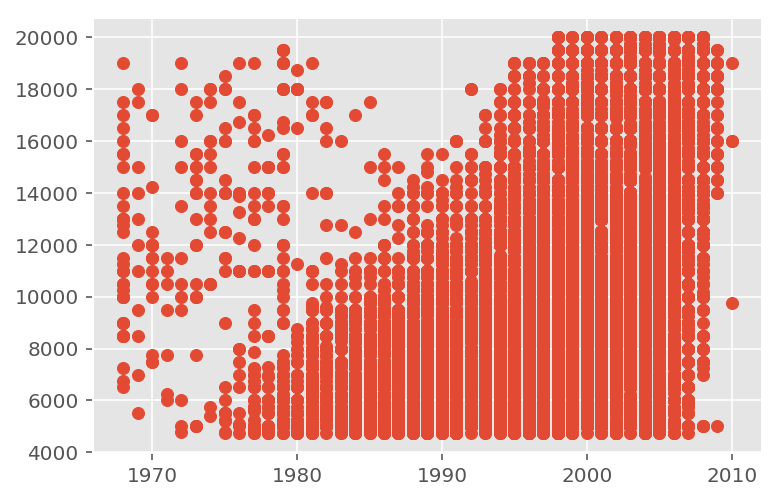

In [82]:
df_SSL2 = df_SSL[df_SSL['yearmade'] >1965]


scatter(df_SSL2['yearmade'], df_SSL2['saleprice']);
bins = np.array([1970,1980,1990,2000,2010])
df_SSL2['yearmade_binned'] = [np.digitize(i, bins) for i in df_SSL2['yearmade']]

In [83]:
df_SSL.forks.dropna(inplace = True)
df_SSL.hydraulics.dropna(inplace = True)
df_SSL.coupler.dropna(inplace = True)
df_SSL.coupler_system.dropna(inplace = True)
df_SSL.grouser_tracks.dropna(inplace = True)
df_SSL.hydraulics_flow.dropna(inplace = True)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:2726: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [84]:
dummy_enclosure = pd.get_dummies(df_SSL['enclosure'])
dummy_enclosure.drop(['OROPS'], 1, inplace=True)

dummy_forks = pd.get_dummies(df_SSL['forks'])
dummy_forks.drop(['None or Unspecified'], 1, inplace=True)

dummy_hydraulics = pd.get_dummies(df_SSL['hydraulics'])
dummy_hydraulics.drop(['Standard'], 1, inplace=True)

dummy_coupler = pd.get_dummies(df_SSL['coupler'])
dummy_coupler.drop(['None or Unspecified'], 1, inplace=True)

dummy_coupler_system = pd.get_dummies(df_SSL['coupler_system'])
dummy_coupler_system.drop(['None or Unspecified'], 1, inplace=True)

dummy_grouser_tracks = pd.get_dummies(df_SSL['grouser_tracks'])
dummy_grouser_tracks.drop(['None or Unspecified'], 1, inplace=True)

dummy_hydraulics_flow  = pd.get_dummies(df_SSL['hydraulics_flow'])
dummy_hydraulics_flow.drop(['None or Unspecified','Standard'], 1, inplace=True)

In [85]:
#d, dummy_hydraulics_flow
dummy_list = [dummy_enclosure, dummy_hydraulics_flow, dummy_coupler, dummy_coupler_system, dummy_grouser_tracks]

In [86]:
bins = np.array([1970,1980,1990,2000,2010])
df_SSL['yearmade_binned'] = [np.digitize(i, bins) for i in df_SSL['yearmade']]

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
df_SSL_dummy = pd.concat(dummy_list,1,join='inner')

df_SSL_model1 = df_SSL_dummy.join(df_SSL['yearmade_binned'].astype(int))
df_SSL_model1 = df_SSL_model1.join(df_SSL['saleprice'])
#df_SSL_model1.isnull().sum()
#df_SSL['yearmade_binned'].value_counts()

In [88]:
df_SSL_model1 = df_SSL_model1.rename(columns = {'saleprice':'saleprice2'})

In [89]:
X = sm.add_constant(df_SSL_model1.iloc[:,:-1])
y = np.log(df_SSL_model1.iloc[:,-1:])
#X.head()

In [90]:
model2 = OLS(y,X).fit()

In [91]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             saleprice2   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1268.
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        19:53:34   Log-Likelihood:                -9952.6
No. Observations:               43362   AIC:                         1.992e+04
Df Residuals:                   43353   BIC:                         2.000e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.9113      0.004   2124.010      0.000       8.903       8.920
EROPS               0.1340      0.007     19.097      0.000       0.120       0.148
EROPS AC         5.601e-16   5.49e-18    101.941      0.000    5.49e-16    5.71e-16
EROPS w AC          0.2491      0.009     28.475      0.000       0.232       0.266
High Flow           0.0936      0.013      7.089      0.000       0.068       0.119
Hydraulic           0.2283      0.014     16.304      0.000       0.201       0.256
Manual              0.2140      0.006     33.094      0.000       0.201       0.227
Yes                -0.1931      0.008    -23.583      0.000      -0.209      -0.177
Yes                 0.1316      0.006     21.422      0.000       0.120       0.144
yearmade_binned     0.0808      0.001     63.507      0.000       0.078       0.083
==============================================================================
Omnibus:                      315.111   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.890
Skew:                           0.011   Prob(JB):                     3.58e-47
Kurtosis:                       2.657   Cond. No.                     1.88e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [92]:
df_MG.dropna(1, how = 'all', inplace = True)
df_MG.drop(['fisecondarydesc', 'fimodelseries', 'fimodeldescriptor'], 1, inplace = True)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
df_MG.transmission.dropna(inplace = True)
df_MG.enclosure.dropna(inplace = True)
df_MG.drive_system.dropna(inplace = True)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:2726: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [94]:
bins = np.array([1950,1960,1970,1980,1990,2000,2010,2015])

df_MG['yearmade_binned'] = [np.digitize(i, bins) for i in df_MG['yearmade']]
df_MG['yearmade_binned'].value_counts()

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


4    6589
5    6062
3    5752
0    2848
6    2308
2    1899
1      31
Name: yearmade_binned, dtype: int64

In [95]:
dummy_transmission = pd.get_dummies(df_MG['transmission'])

In [96]:
dummy_transmission = pd.get_dummies(df_MG['transmission'])
dummy_transmission.drop(['None or Unspecified', 'Standard', 'AutoShift'], 1, inplace=True)

dummy_drive_system = pd.get_dummies(df_MG['drive_system'])
dummy_drive_system.drop(['No', 'Two Wheel Drive'], 1, inplace=True)

dummy_enclosure = pd.get_dummies(df_MG['enclosure'])
dummy_enclosure.drop(['OROPS', 'EROPS AC'], 1, inplace=True)
# dummy_ride_control = pd.get_dummies(df_bl['ride_control'])
# dummy_ride_control.drop(['None or Unspecified'], 1, inplace=True)

# dummy_turbocharged = pd.get_dummies(df_bl['turbocharged'], drop_first=True)

# dummy_drive_system = pd.get_dummies(df_bl['drive_system'])
# dummy_drive_system.drop(['All Wheel Drive', 'No', 'Four Wheel Drive'], 1, inplace=True)

# dummy_pad_type = pd.get_dummies(df_bl['pad_type'])
# dummy_pad_type.drop(['None or Unspecified'], 1, inplace=True)

# dummy_transmission = pd.get_dummies(df_bl['transmission'], drop_first=True)
# dummy_transmission.drop(['None or Unspecified', 'Standard'], 1, inplace=True)


# dummy_thumb = pd.get_dummies(df_tex['thumb'])
# dummy_thumb.drop(['None or Unspecified'],1, inplace = True)

In [97]:
df_MG_dummy = pd.concat([dummy_enclosure, dummy_drive_system, dummy_transmission, df_MG['yearmade_binned']],1, join = 'inner')
df_MG_model1 = df_MG_dummy.join(df_MG['saleprice'])
df_MG_model1['yearmade_binned'] = df_MG_model1['yearmade_binned'].astype(int)

In [98]:
df_MG_model1 = df_MG_model1.rename(columns = {'saleprice':'saleprice3'})  

In [99]:
X = sm.add_constant(df_MG_model1.iloc[:,:-1])
y = np.log(df_MG_model1.iloc[:,-1:])
model3 = OLS(y, X).fit()

#### model3.summary()

In [100]:
df_bl.dropna(1, how = 'all', inplace = True)
df_bl.drop(['fisecondarydesc', 'fimodelseries', 'fimodeldescriptor'], 1, inplace = True)
df_bl.forks.dropna(inplace = True)
df_bl.turbocharged.dropna(inplace = True)
df_bl.enclosure.dropna(inplace = True)
df_bl.pad_type.dropna(inplace = True)
df_bl.drive_system.dropna(inplace = True)
df_bl.stick.dropna(inplace = True)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Haebichan/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:2726: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [101]:
bins = np.array([1950,1960,1970,1980,1990,2000,2010,2015])

df_bl['yearmade_binned'] = [np.digitize(i, bins) for i in df_bl['yearmade']]
df_bl['yearmade_binned'].value_counts()

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


5    33980
6    22990
4    15584
0     4805
3     2042
2       12
7        2
Name: yearmade_binned, dtype: int64

In [102]:
dummy_forks = pd.get_dummies(df_bl['forks'], drop_first=True)

dummy_stick = pd.get_dummies(df_bl['stick'], drop_first=True)


dummy_ride_control = pd.get_dummies(df_bl['ride_control'])
dummy_ride_control.drop(['None or Unspecified'], 1, inplace=True)

dummy_turbocharged = pd.get_dummies(df_bl['turbocharged'], drop_first=True)

dummy_drive_system = pd.get_dummies(df_bl['drive_system'])
dummy_drive_system.drop(['All Wheel Drive', 'No', 'Four Wheel Drive'], 1, inplace=True)

dummy_pad_type = pd.get_dummies(df_bl['pad_type'])
dummy_pad_type.drop(['None or Unspecified'], 1, inplace=True)

dummy_transmission = pd.get_dummies(df_bl['transmission'], drop_first=True)
dummy_transmission.drop(['None or Unspecified', 'Standard'], 1, inplace=True)
dummy_enclosure = pd.get_dummies(df_bl['enclosure'])
dummy_enclosure.drop(['OROPS', 'EROPS w AC'], 1, inplace=True)

# dummy_thumb = pd.get_dummies(df_tex['thumb'])
# dummy_thumb.drop(['None or Unspecified'],1, inplace = True)

In [103]:

df_bl_dummy_old = pd.concat([dummy_forks, dummy_stick, dummy_turbocharged, dummy_transmission, dummy_enclosure, dummy_drive_system],1, join = 'inner')
df_bl_dummy = pd.concat([dummy_stick, dummy_enclosure, dummy_drive_system, dummy_pad_type, df_bl['yearmade_binned']],1, join = 'inner')

In [104]:
df_bl_model1 = df_bl_dummy.join(df_bl['saleprice'])
df_bl_model1['yearmade_binned'] = df_bl_model1['yearmade_binned'].astype(int)

In [105]:
df_bl_model1 = df_bl_model1.rename(columns = {'saleprice':'saleprice4'})  

In [106]:
X = sm.add_constant(df_bl_model1.iloc[:,:-1])
y = np.log(df_bl_model1.iloc[:,-1:])

model4 = OLS(y, X).fit()

In [107]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             saleprice4   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     5266.
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        19:53:36   Log-Likelihood:                -21197.
No. Observations:               79415   AIC:                         4.241e+04
Df Residuals:                   79406   BIC:                         4.250e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.5485      0.005   1946.831      0.000       9.539       9.558
Standard           -0.0964      0.002    -39.550      0.000      -0.101      -0.092
EROPS              -0.0207      0.003     -7.880      0.000      -0.026      -0.016
EROPS AC           -0.3382      0.316     -1.070      0.285      -0.958       0.281
Two Wheel Drive    -0.2135      0.002    -87.113      0.000      -0.218      -0.209
Grouser             0.2485      0.063      3.930      0.000       0.125       0.372
Reversible          0.1619      0.004     36.493      0.000       0.153       0.171
Street              0.1303      0.006     20.785      0.000       0.118       0.143
yearmade_binned     0.1054      0.001    129.649      0.000       0.104       0.107
==============================================================================
Omnibus:                      351.239   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.359
Skew:                          -0.158   Prob(JB):                     2.52e-78
Kurtosis:                       3.090   Cond. No.                     1.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
df_wl.dropna(1, how = 'all', inplace = True)
df_wl.drop(['fisecondarydesc', 'fimodelseries', 'fimodeldescriptor'], 1, inplace = True)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
df_wl = df_wl[df_wl.enclosure != 'None or Unspecified']
df_wl = df_wl[df_wl.hydraulics != 'None or Unspecified']
df_wl = df_wl[df_wl.steering_controls != 'None or Unspecified']
df_wl = df_wl[df_wl.differential_type != 'None or Unspecified']
df_wl = df_wl[df_wl.coupler != 'None or Unspecified']
df_wl = df_wl[df_wl.ride_control != 'None or Unspecified']

df_wl = df_wl[df_wl.forks != 'None or Unspecified']
df_wl = df_wl[df_wl.state != 'None or Unspecified']
df_wl = df_wl[df_wl.productsize != 'None or Unspecified']


In [110]:
df_wl.enclosure.dropna(inplace = True)
df_wl.hydraulics.dropna(inplace = True)
df_wl.productsize.dropna(inplace = True)
df_wl.steering_controls.dropna(inplace = True)
df_wl.differential_type.dropna(inplace = True)
df_wl.coupler.dropna(inplace = True)
df_wl.ride_control.dropna(inplace = True)








In [111]:
dummy_difftype = pd.get_dummies(df_wl['differential_type'])
dummy_difftype.drop(['Locking'], 1, inplace=True)



dummy_coupler = pd.get_dummies(df_wl['coupler'], sparse = True)

dummy_ridecontrol = pd.get_dummies(df_wl['ride_control'])
dummy_ridecontrol.drop(['No'], 1, inplace=True)
dummy_hydraulics = pd.get_dummies(df_wl['hydraulics'])
dummy_enclosure = pd.get_dummies(df_wl['enclosure'])
dummy_enclosure.drop(['EROPS','EROPS AC','OROPS'], 1, inplace=True)
df_wl.usageband.replace(['High', 'Medium', 'Low'], [2,1,0], inplace = True)

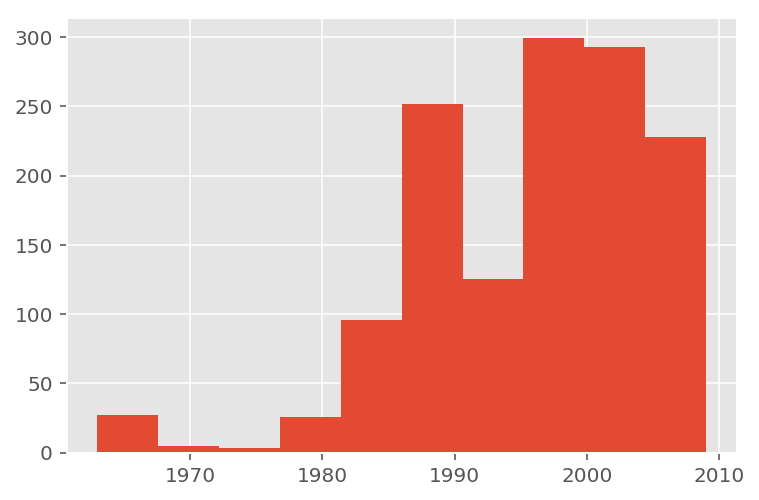

In [112]:
hist(df_wl[df_wl.yearmade != 1000]['yearmade'])

bins = np.array([1950,1960,1970,1980,1990,2000,2010])

df_wl['yearmade_bin'] = [np.digitize(i, bins) for i in df_wl['yearmade']]
df_wl['yearmade_bin'] = df_wl['yearmade_bin'].astype(int)

In [113]:
df_wl_dummy = pd.concat([dummy_difftype,dummy_coupler,dummy_ridecontrol,dummy_enclosure,df_wl.usageband, df_wl['yearmade_bin']],1, join = 'inner')
df_wl_dummy = df_wl_dummy[df_wl_dummy.usageband.notnull()]
df_wl_model1 = df_wl_dummy.join(df_wl['saleprice'])

In [114]:
df_wl_model1 = df_wl_model1.rename(columns = {'saleprice':'saleprice4'})  

In [115]:
X = sm.add_constant(df_wl_model1.iloc[:,:-1])
y = np.log(df_wl_model1.iloc[:,-1:])


In [116]:
model5 = OLS(y, X).fit()

In [117]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             saleprice4   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     21.15
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           2.12e-17
Time:                        19:53:37   Log-Likelihood:                -73.942
No. Observations:                 237   AIC:                             159.9
Df Residuals:                     231   BIC:                             180.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Limited Slip     2.4549      0.045     54.656      0.000       2.366       2.543
No Spin       3.749e-15   6.89e-17     54.450      0.000    3.61e-15    3.89e-15
Standard         2.4891      0.037     67.399      0.000       2.416       2.562
Hydraulic        2.4769      0.037     66.755      0.000       2.404       2.550
Manual           2.4672      0.040     60.941      0.000       2.387       2.547
Yes              4.9440      0.064     77.428      0.000       4.818       5.070
EROPS w AC       0.1916      0.059      3.237      0.001       0.075       0.308
usageband       -0.0795      0.040     -1.993      0.047      -0.158      -0.001
yearmade_bin     0.1799      0.022      8.349      0.000       0.137       0.222
==============================================================================
Omnibus:                       19.535   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.168
Skew:                          -0.743   Prob(JB):                     1.54e-05
Kurtosis:                       3.196   Cond. No.                     1.22e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.87e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [118]:
df_ttt.dropna(1, how = 'all', inplace = True)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
df_ttt = df_ttt[df_ttt['blade_type'].notnull()]
df_ttt = df_ttt[df_ttt['travel_controls'].notnull()]
df_ttt = df_ttt[df_ttt['blade_type'].notnull()]
df_ttt = df_ttt[df_ttt['hydraulics'].notnull()]
df_ttt = df_ttt[df_ttt['ripper'].notnull()]

In [120]:
dummy_blade_type = pd.get_dummies(df_ttt['blade_type'])
dummy_blade_type.drop(['PAT'], 1 , inplace = True)
# dummy_blade_type.drop(['No'], 1 , inplace = True)

dummy_travel_controls = pd.get_dummies(df_ttt['travel_controls'])
dummy_travel_controls.drop(['None or Unspecified'], 1 , inplace = True)
# dummy_travel_controls.drop(['2 Pedal'], 1 , inplace = True)


dummy_state = pd.get_dummies(df_ttt['state'], drop_first = True)
dummy_state.drop(['Georgia','Hawaii','Louisiana', 'New Jersey','Rhode Island', 'Mississippi', 'Puerto Rico','Texas'], 1, inplace = True)
dummy_state.drop(['South Dakota'], 1, inplace = True)
dummy_state.drop(['Delaware'], 1, inplace = True)


dummy_ripper = pd.get_dummies(df_ttt['ripper'], drop_first = True)

dummy_transmission = pd.get_dummies(df_ttt['transmission'], drop_first = True)




In [121]:
bins = np.array([1950,1960,1970,1980,1990,2000,2010,2015])

df_ttt['yearmade_binned'] = [np.digitize(i, bins) for i in df_ttt['yearmade']]
df_ttt['yearmade_binned'] = df_ttt['yearmade_binned'].astype(int)

In [122]:
df_ttt_dummy = pd.concat([dummy_blade_type,dummy_travel_controls, dummy_state, dummy_ripper, dummy_transmission, df_ttt['yearmade_binned'], df_ttt['machineid']], 1)
df_ttt_model = df_ttt_dummy.join(df_ttt['saleprice'])

In [123]:
df_ttt_model = df_ttt_model.rename(columns = {'saleprice':'saleprice1'})

In [124]:
X = sm.add_constant(df_ttt_model.iloc[:,:-1])
y = np.log(df_ttt_model.iloc[:,-1:])


In [125]:
model6 = OLS(y,X).fit()

In [126]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             saleprice1   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     985.9
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        19:53:40   Log-Likelihood:                -54747.
No. Observations:               78672   AIC:                         1.096e+05
Df Residuals:                   78611   BIC:                         1.102e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.5385      0.026    369.477      0.000       9.488       9.589
Angle                   0.1820      0.012     14.824      0.000       0.158       0.206
Coal                    0.7832      0.146      5.346      0.000       0.496       1.070
Landfill                0.6522      0.097      6.708      0.000       0.462       0.843
None or Unspecified     0.1264      0.005     23.601      0.000       0.116       0.137
Semi U                  0.5414      0.006     85.215      0.000       0.529       0.554
Straight                0.2652      0.005     51.214      0.000       0.255       0.275
U                       0.4902      0.012     40.337      0.000       0.466       0.514
VPAT                    0.2913      0.011     26.544      0.000       0.270       0.313
Differential Steer      0.3860      0.008     49.719      0.000       0.371       0.401
Finger Tip              0.2411      0.012     20.008      0.000       0.217       0.265
Lever                   0.2308      0.017     13.353      0.000       0.197       0.265
Pedal                  -0.1615      0.024     -6.740      0.000      -0.209      -0.115
Alaska                 -0.1879      0.042     -4.512      0.000      -0.270      -0.106
Arizona                -0.0429      0.020     -2.108      0.035      -0.083      -0.003
Arkansas               -0.0676      0.014     -4.828      0.000      -0.095      -0.040
California             -0.0199      0.009     -2.201      0.028      -0.038      -0.002
Colorado               -0.0965      0.015     -6.239      0.000      -0.127      -0.066
Connecticut            -0.1110      0.014     -7.945      0.000      -0.138      -0.084
Florida                 0.0555      0.005     10.294      0.000       0.045       0.066
Idaho                  -0.1623      0.028     -5.814      0.000      -0.217      -0.108
Illinois               -0.0249      0.012     -2.158      0.031      -0.047      -0.002
Indiana                -0.1304      0.016     -8.117      0.000      -0.162      -0.099
Iowa                    0.0462      0.027      1.697      0.090      -0.007       0.100
Kansas                  0.0174      0.042      0.411      0.681      -0.066       0.101
Kentucky               -0.0064      0.013     -0.490      0.624      -0.032       0.019
Maine                  -0.0629      0.016     -3.986      0.000      -0.094      -0.032
Maryland               -0.0711      0.010     -7.258      0.000      -0.090      -0.052
Massachusetts          -0.2983      0.078     -3.832      0.000      -0.451      -0.146
Michigan               -0.1999      0.023     -8.770      0.000      -0.245      -0.155
Minnesota              -0.0709      0.012     -5.798      0.000      -0.095      -0.047
Missouri               -0.0189      0.013     -1.403      0.161      -0.045       0.008
Mon

In [127]:
final_list = [df_tex_model1, df_SSL_model1, df_MG_model1, df_bl_model1, df_wl_model1,df_ttt_model]

In [128]:
final_df = pd.concat([df['salesid'], df_tex_model1, df_SSL_model1,df_MG_model1, df_bl_model1, df_wl_model1,df_ttt_model],1)



In [129]:
final_df['saleprice5']= final_df['saleprice4'].iloc[:,:-1]

In [130]:
final_df['final_saleprice'] = final_df['saleprice'].combine_first(final_df['saleprice1']).combine_first(final_df['saleprice2']).combine_first(final_df['saleprice3']).combine_first(final_df['saleprice5'])

In [131]:
final_df.drop(['saleprice','saleprice1','saleprice2','saleprice3','saleprice5'],1,inplace = True)

In [132]:
final_df.fillna(0,inplace = True)

In [133]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1:]

In [134]:
final_model = OLS(y,X).fit()

In [135]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        final_saleprice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 2.105e+04
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        19:54:00   Log-Likelihood:            -4.3891e+06
No. Observations:              401125   AIC:                         8.778e+06
Df Residuals:                  401026   BIC:                         8.779e+06
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
salesid              3.373e-05   1.74e-05      1.942      0.052   -3.14e-07    6.78e-05
Double                930.6039    107.887      8.626      0.000     719.149    1142.058
Steel                4923.6819    140.587     35.022      0.000    4648.136    5199.227
Standard             3418.3295    102.258     33.429      0.000    3217.907    3618.752
EROPS               -9506.0927     86.930   -109.353      0.000   -9676.473   -9335.712
EROPS AC            -5.132e-08   5.29e-08     -0.970      0.332   -1.55e-07    5.23e-08
Hydraulic            1114.9402    173.724      6.418      0.000     774.446    1455.435
Manual               -417.6689    149.838     -2.787      0.005    -711.346    -123.991
productsize          1.365e+04     63.980    213.408      0.000    1.35e+04    1.38e+04
yearmade_binned      3691.0738     19.733    187.053      0.000    3652.398    3729.749
EROPS                1763.9615    315.232      5.596      0.000    1146.117    2381.806
EROPS AC             2.052e-09   2.28e-09      0.902      0.367   -2.41e-09    6.51e-09
EROPS w AC           2779.0354    392.919      7.073      0.000    2008.927    3549.144
High Flow             928.6671    592.954      1.566      0.117    -233.505    2090.839
Hydraulic            2073.2246    628.630      3.298      0.001     841.129    3305.321
Manual               1813.4970    289.941      6.255      0.000    1245.221    2381.773
Yes                 -1819.7080    367.621     -4.950      0.000   -2540.235   -1099.181
Yes                  1244.2300    275.847      4.511      0.000     703.579    1784.882
yearmade_binned      2891.9076     24.257    119.219      0.000    2844.365    2939.451
EROPS                6689.4772    185.205     36.119      0.000    6326.482    7052.473
EROPS w AC            3.31e+04    259.884    127.378      0.000    3.26e+04    3.36e+04
All Wheel Drive      -370.4899    496.433     -0.746      0.455   -1343.484     602.504
Hydrostatic          1.423e+04   1.37e+04      1.041      0.298   -1.26e+04     4.1e+04
Powershift           5683.7476    312.826     18.169      0.000    5070.619    6296.876
yearmade_binned      9032.8605     44.110    204.781      0.000    8946.407    9119.314
Standard               -1.7137     99.702     -0.017      0.986    -197.127     193.699
EROPS                  -2.2634    108.396     -0.021      0.983    -214.716     210.189
EROPS AC              -46.4576   1.37e+04     -0.003      0.997   -2.68e+04    2.68e+04
Two Wheel Drive       -18.1865     98.914     -0.184      0.854    -212.055     175.682
Grouser                -3.7297   2735.634     -0.001      0.999   -5365.490    5358.030
Reversible             -2.8967    194.311     -0.015      0.988    -383.740     377.946
Street                  1.5553    272.175      0.006      0.995    -531.900     535.011
yea

In [143]:
final_df = final_df[final_df.final_saleprice != 0]

In [144]:
final_df.to_csv('data/final_df.csv')

In [137]:
pdf.head()

,SalesID,SalePrice
0,1222837,24000.0
1,1222839,24000.0
2,1222841,24000.0
3,1222843,24000.0
4,1222845,24000.0


In [139]:
test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1222837,902859,1376,121,3,1000,0.0,NaN,1/5/2012 0:00,375L,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,1/5/2012 0:00,TX300LC2,...,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
2,1222841,999308,4587,121,3,2000,10127.0,Medium,1/5/2012 0:00,270LC,...,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1222843,1062425,1954,121,3,1000,4682.0,Low,1/5/2012 0:00,892DLC,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,1/4/2012 0:00,544H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
5,1222847,530790,7019,121,3,2001,0.0,NaN,1/5/2012 0:00,246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1222849,1040520,3854,121,3,1000,1529.0,Low,1/5/2012 0:00,966C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
7,1222850,1061730,3854,121,3,1000,3998.0,Low,1/5/2012 0:00,966C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
8,1222855,531393,23926,121,3,1000,8145.0,Low,1/4/2012 0:00,12HNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1222863,317287,4106,121,3,2002,3211.0,Low,1/5/2012 0:00,D4G,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [140]:
pdf['SalePrice'] = final_model.predict())

SyntaxError: invalid syntax (<ipython-input-140-3d312264c467>, line 1)

In [ ]:
y_pred.head()

In [ ]:
y_pred_series = y_pred.rename(index='SaleID', columns='SalePrice')

In [239]:
y_pred_series.to_csv('data/y_pred.csv', header=True)

In [240]:
!head data/y_pred.csv

,SaleID
0,11793.744703114238
1,48033.09688268714
2,12928.708009739361
3,26500.000000255684
4,42726.4140561511
5,27000.000005205882
6,16904.96950146176
7,24000.000005073638
8,36086.50060887315


In [210]:
list(final_df.columns)

['Double',
 'Steel',
 'Standard',
 'EROPS',
 'EROPS AC',
 'Hydraulic',
 'Manual',
 'productsize',
 'yearmade_binned',
 'EROPS',
 'EROPS w AC',
 'High Flow',
 'Hydraulic',
 'Manual',
 'Yes',
 'Yes',
 'yearmade_binned',
 'EROPS',
 'EROPS w AC',
 'All Wheel Drive',
 'Powershift',
 'yearmade_binned',
 'Standard',
 'EROPS',
 'Two Wheel Drive',
 'Grouser',
 'Reversible',
 'Street',
 'yearmade_binned',
 'saleprice4',
 'Limited Slip',
 'No Spin',
 'Standard',
 'Hydraulic',
 'Manual',
 'Yes',
 'EROPS w AC',
 'usageband',
 'yearmade_bin',
 'saleprice4',
 'Angle',
 'Coal',
 'Landfill',
 'None or Unspecified',
 'Semi U',
 'Straight',
 'U',
 'VPAT',
 'Differential Steer',
 'Finger Tip',
 'Lever',
 'Pedal',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Florida',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 '

In [250]:
test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1222837,902859,1376,121,3,1000,0.0,NaN,1/5/2012 0:00,375L,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,1/5/2012 0:00,TX300LC2,...,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
2,1222841,999308,4587,121,3,2000,10127.0,Medium,1/5/2012 0:00,270LC,...,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1222843,1062425,1954,121,3,1000,4682.0,Low,1/5/2012 0:00,892DLC,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,1/4/2012 0:00,544H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
5,1222847,530790,7019,121,3,2001,0.0,NaN,1/5/2012 0:00,246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1222849,1040520,3854,121,3,1000,1529.0,Low,1/5/2012 0:00,966C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
7,1222850,1061730,3854,121,3,1000,3998.0,Low,1/5/2012 0:00,966C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
8,1222855,531393,23926,121,3,1000,8145.0,Low,1/4/2012 0:00,12HNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1222863,317287,4106,121,3,2002,3211.0,Low,1/5/2012 0:00,D4G,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
